# Ejemplo 1

In [10]:
#importar librerias
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA, KernelPCA
from sklearn.decomposition import FactorAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import MDS
from sklearn.manifold import Isomap
from sklearn.manifold import LocallyLinearEmbedding

Pn=np.load('Pn.npy') 
Po=np.load('Po.npy') 
Pi=np.load('Pi.npy') 
En=np.load('En.npy') 
Eo=np.load('Eo.npy') 
Ei=np.load('Ei.npy') 

P0=np.concatenate((Pn,En),axis=1)
P1=np.concatenate((Po,Eo),axis=1)
P2=np.concatenate((Pi,Ei),axis=1)

Nt=len(Pi) #numero de datos 

X=np.concatenate((P0,P1,P2),axis=0) 

# estandarizar los datos
scaler = preprocessing.StandardScaler().fit(X)
Xs=scaler.transform(X) 




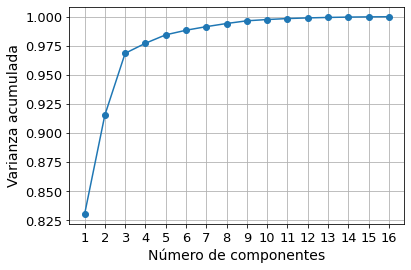

In [11]:
#Determinar el número de componentes con PCA
pca = PCA(n_components=16)
pca.fit(Xs)
varianza=pca.explained_variance_ratio_.cumsum()

plt.figure()
plt.plot(np.arange(1,17),varianza,'-o')
plt.xlabel('Número de componentes', fontsize=14)
plt.ylabel('Varianza acumulada', fontsize=14)
plt.xticks(np.arange(1,17))
plt.grid()


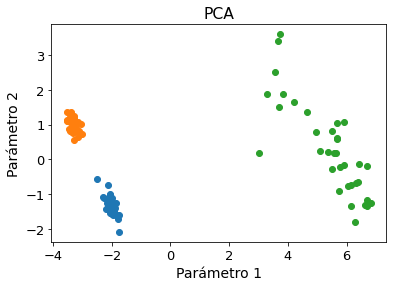

In [13]:
#PCA
pca = PCA(n_components=7)
Xt = pca.fit_transform(Xs)
title='PCA'


plt.figure()
plt.scatter(Xt[1:Nt, 0], Xt[1:Nt, 1])
plt.scatter(Xt[Nt+1:2*Nt, 0], Xt[Nt+1:2*Nt, 1])
plt.scatter(Xt[2*Nt+1:3*Nt, 0], Xt[2*Nt+1:3*Nt, 1])
plt.xlabel('Parámetro 1', fontsize=14)
plt.ylabel('Parámetro 2', fontsize=14)
plt.title(title)
plt.show()



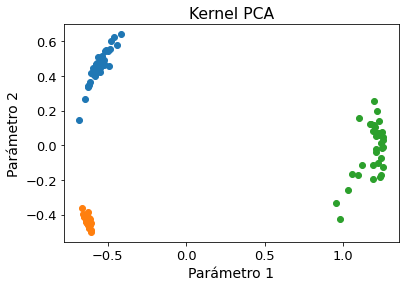

In [14]:
# #Kernel PCA
kpca = KernelPCA(n_components=7, kernel="cosine") #linear, rbf, poly, sigmmoid
Xt = kpca.fit_transform(Xs)
title='Kernel PCA'

plt.figure()
plt.scatter(Xt[1:Nt, 0], Xt[1:Nt, 1])
plt.scatter(Xt[Nt+1:2*Nt, 0], Xt[Nt+1:2*Nt, 1])
plt.scatter(Xt[2*Nt+1:3*Nt, 0], Xt[2*Nt+1:3*Nt, 1])
plt.xlabel('Parámetro 1', fontsize=14)
plt.ylabel('Parámetro 2', fontsize=14)
plt.title(title)
plt.show()

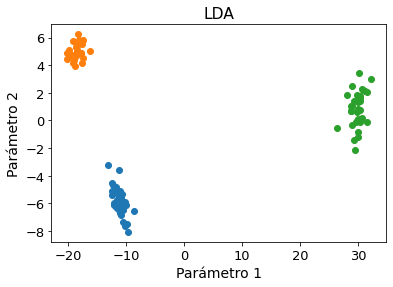

In [15]:
#LDA
# #etiquetas
y1=np.ones(len(P0));
y2=2*np.ones(len(P1));
y3=3*np.ones(len(P2));
Y=np.concatenate((y1,y2,y3),axis=0)
lda = LinearDiscriminantAnalysis(n_components=2) #n_components < n_classes - 1
Xt = lda.fit_transform(Xs,Y)
title='LDA'

plt.figure()
plt.scatter(Xt[1:Nt, 0], Xt[1:Nt, 1])
plt.scatter(Xt[Nt+1:2*Nt, 0], Xt[Nt+1:2*Nt, 1])
plt.scatter(Xt[2*Nt+1:3*Nt, 0], Xt[2*Nt+1:3*Nt, 1])
plt.xlabel('Parámetro 1', fontsize=14)
plt.ylabel('Parámetro 2', fontsize=14)
plt.title(title)
plt.show()
